# Getting started

Download the dataset from [kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce), and unizp all of the `csv` files under the `datasets` folder

In [1]:
from os import walk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%config InlineBackend.figure_format = 'jpeg'

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False)

In [3]:
!ls datasets

olist_customers_dataset.csv           olist_orders_dataset.csv
olist_geolocation_dataset.csv         olist_products_dataset.csv
olist_order_items_dataset.csv         olist_sellers_dataset.csv
olist_order_payments_dataset.csv      product_category_name_translation.csv
olist_order_reviews_dataset.csv


In [4]:
filenames = next(walk("datasets"), (None, None, []))[2]

## Loading our dataset

In [5]:
dfs = {filename.split(".")[0]:pd.read_csv(f"datasets/{filename}") for filename in filenames}

In [6]:
for key, value in dfs.items():
    print(f"DF - {key}:")
    display(value.head())

DF - olist_sellers_dataset:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


DF - product_category_name_translation:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


DF - olist_orders_dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


DF - olist_order_items_dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


DF - olist_customers_dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


DF - olist_geolocation_dataset:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


DF - olist_order_payments_dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


DF - olist_order_reviews_dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


DF - olist_products_dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# Preprocessing

### Joining tables into a single one

In [7]:
# product_category_name_translation is useless
# can't join easily olist_geolocation_dataset table, check usefulness later
df = (
    dfs["olist_order_items_dataset"]
    .join(dfs["olist_products_dataset"].set_index('product_id'), on='product_id', rsuffix='_products')
    .join(dfs["olist_orders_dataset"].set_index('order_id'), on='order_id', rsuffix='_orders')
    .join(dfs["olist_order_reviews_dataset"].set_index('order_id'), on='order_id', rsuffix='_reviews')
    .join(dfs["olist_order_payments_dataset"].set_index('order_id'), on='order_id', rsuffix='_payments')
    .join(dfs["olist_customers_dataset"].set_index('customer_id'), on='customer_id', rsuffix='_customers')
    .join(dfs["olist_sellers_dataset"].set_index('seller_id'), on='seller_id', rsuffix='_sellers')
)

In [8]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR


### Initial exploration

Here we'll verify if/why some cols have null or zero values.

In [9]:
df[df['payment_sequential'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR


In [10]:
df[df['payment_type'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR


In [11]:
df[df['payment_value'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR


In [12]:
df[df['payment_installments'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,81810,curitiba,PR


#### 3 null values, due to the product not being delivered

The above 3 cells show us that there are 3 rows with null values for the payment info. After checking the `review_comment_message`, we noticed that that's due to the product never being delivered: 

> "nao recebi o produto e nem resposta da empresa"

We'll just drop those rows, since they have no signifcant value to us.

In [13]:
# removing the aforementioned 3 rows
df = df[df['payment_installments'].notna()]

In [14]:
df[df['product_weight_g'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
7098,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,2017-04-03 07:54:34,2017-04-04 08:02:26,2017-04-12 08:58:13,2017-04-13 21:08:08,2017-05-02 00:00:00,57a934e60ad82d078eb474eb608a2d39,5,NaN,"Produto excelente, entregue antes do prazo",2017-04-14 00:00:00,2017-04-15 10:36:47,1.0,credit_card,1.0,43.52,a330c3cd4e607dd2f8dca4e303325e6f,22631,rio de janeiro,RJ,12327,jacarei,SP
9233,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca29b2bf57243228e98eab2dab805ae9,delivered,2017-04-02 10:00:43,2017-04-02 10:10:16,2017-04-04 16:19:55,2017-04-18 13:53:58,2017-05-04 00:00:00,d3326d58985f61faf6b5e61e07d58cf0,5,NaN,"sempre comprei na lannister.com e nunca tive nenhum problema, com entrega, informações, compra etc. nota 10.",2017-04-19 00:00:00,2017-04-20 13:17:27,1.0,credit_card,4.0,45.05,eabb0c62caa8436a85aa820d2ac1323b,73105,brasilia,DF,12327,jacarei,SP
28715,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
28716,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696e8f940eeee6b009d1539b59e47366,delivered,2017-08-09 23:50:08,2017-08-11 04:26:04,2017-08-14 14:46:16,2017-08-17 19:32:48,2017-08-25 00:00:00,b18e318786afa8f9ce97b4249e644d0b,2,NaN,Foi me enviado um produto divergente ao que foi comprado.,2017-08-18 00:00:00,2017-08-20 23:29:05,1.0,boleto,1.0,48.27,5c71f03d38ea1426874ace382efa488d,13190,monte mor,SP,12327,jacarei,SP
48424,6e150190fbe04c642a9cf0b80d83ee16,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135a42a465867ff932f1222f71a3efb2,delivered,2017-06-24 16:33:35,2017-06-24 16:45:14,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31 00:00:00,3a1e44f9d4660e76dd8c550f1afae888,5,NaN,loja confiável estou satisfeito com a aquisição.\r\nRECOMENDO,2017-07-08 00:00:00,2017-07-10 18:31:23,1.0,credit_card,2.0,55.79,c5628087b9b42549720ee8b57f0a6a98,78600,barra do garcas,MT,12327,jac

In [15]:
df[df['product_length_cm'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
7098,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,2017-04-03 07:54:34,2017-04-04 08:02:26,2017-04-12 08:58:13,2017-04-13 21:08:08,2017-05-02 00:00:00,57a934e60ad82d078eb474eb608a2d39,5,NaN,"Produto excelente, entregue antes do prazo",2017-04-14 00:00:00,2017-04-15 10:36:47,1.0,credit_card,1.0,43.52,a330c3cd4e607dd2f8dca4e303325e6f,22631,rio de janeiro,RJ,12327,jacarei,SP
9233,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca29b2bf57243228e98eab2dab805ae9,delivered,2017-04-02 10:00:43,2017-04-02 10:10:16,2017-04-04 16:19:55,2017-04-18 13:53:58,2017-05-04 00:00:00,d3326d58985f61faf6b5e61e07d58cf0,5,NaN,"sempre comprei na lannister.com e nunca tive nenhum problema, com entrega, informações, compra etc. nota 10.",2017-04-19 00:00:00,2017-04-20 13:17:27,1.0,credit_card,4.0,45.05,eabb0c62caa8436a85aa820d2ac1323b,73105,brasilia,DF,12327,jacarei,SP
28715,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
28716,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696e8f940eeee6b009d1539b59e47366,delivered,2017-08-09 23:50:08,2017-08-11 04:26:04,2017-08-14 14:46:16,2017-08-17 19:32:48,2017-08-25 00:00:00,b18e318786afa8f9ce97b4249e644d0b,2,NaN,Foi me enviado um produto divergente ao que foi comprado.,2017-08-18 00:00:00,2017-08-20 23:29:05,1.0,boleto,1.0,48.27,5c71f03d38ea1426874ace382efa488d,13190,monte mor,SP,12327,jacarei,SP
48424,6e150190fbe04c642a9cf0b80d83ee16,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135a42a465867ff932f1222f71a3efb2,delivered,2017-06-24 16:33:35,2017-06-24 16:45:14,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31 00:00:00,3a1e44f9d4660e76dd8c550f1afae888,5,NaN,loja confiável estou satisfeito com a aquisição.\r\nRECOMENDO,2017-07-08 00:00:00,2017-07-10 18:31:23,1.0,credit_card,2.0,55.79,c5628087b9b42549720ee8b57f0a6a98,78600,barra do garcas,MT,12327,jac

In [16]:
df[df['product_height_cm'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
7098,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,2017-04-03 07:54:34,2017-04-04 08:02:26,2017-04-12 08:58:13,2017-04-13 21:08:08,2017-05-02 00:00:00,57a934e60ad82d078eb474eb608a2d39,5,NaN,"Produto excelente, entregue antes do prazo",2017-04-14 00:00:00,2017-04-15 10:36:47,1.0,credit_card,1.0,43.52,a330c3cd4e607dd2f8dca4e303325e6f,22631,rio de janeiro,RJ,12327,jacarei,SP
9233,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca29b2bf57243228e98eab2dab805ae9,delivered,2017-04-02 10:00:43,2017-04-02 10:10:16,2017-04-04 16:19:55,2017-04-18 13:53:58,2017-05-04 00:00:00,d3326d58985f61faf6b5e61e07d58cf0,5,NaN,"sempre comprei na lannister.com e nunca tive nenhum problema, com entrega, informações, compra etc. nota 10.",2017-04-19 00:00:00,2017-04-20 13:17:27,1.0,credit_card,4.0,45.05,eabb0c62caa8436a85aa820d2ac1323b,73105,brasilia,DF,12327,jacarei,SP
28715,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
28716,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696e8f940eeee6b009d1539b59e47366,delivered,2017-08-09 23:50:08,2017-08-11 04:26:04,2017-08-14 14:46:16,2017-08-17 19:32:48,2017-08-25 00:00:00,b18e318786afa8f9ce97b4249e644d0b,2,NaN,Foi me enviado um produto divergente ao que foi comprado.,2017-08-18 00:00:00,2017-08-20 23:29:05,1.0,boleto,1.0,48.27,5c71f03d38ea1426874ace382efa488d,13190,monte mor,SP,12327,jacarei,SP
48424,6e150190fbe04c642a9cf0b80d83ee16,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135a42a465867ff932f1222f71a3efb2,delivered,2017-06-24 16:33:35,2017-06-24 16:45:14,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31 00:00:00,3a1e44f9d4660e76dd8c550f1afae888,5,NaN,loja confiável estou satisfeito com a aquisição.\r\nRECOMENDO,2017-07-08 00:00:00,2017-07-10 18:31:23,1.0,credit_card,2.0,55.79,c5628087b9b42549720ee8b57f0a6a98,78600,barra do garcas,MT,12327,jac

In [17]:
df[df['product_width_cm'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
7098,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,2017-04-03 07:54:34,2017-04-04 08:02:26,2017-04-12 08:58:13,2017-04-13 21:08:08,2017-05-02 00:00:00,57a934e60ad82d078eb474eb608a2d39,5,NaN,"Produto excelente, entregue antes do prazo",2017-04-14 00:00:00,2017-04-15 10:36:47,1.0,credit_card,1.0,43.52,a330c3cd4e607dd2f8dca4e303325e6f,22631,rio de janeiro,RJ,12327,jacarei,SP
9233,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca29b2bf57243228e98eab2dab805ae9,delivered,2017-04-02 10:00:43,2017-04-02 10:10:16,2017-04-04 16:19:55,2017-04-18 13:53:58,2017-05-04 00:00:00,d3326d58985f61faf6b5e61e07d58cf0,5,NaN,"sempre comprei na lannister.com e nunca tive nenhum problema, com entrega, informações, compra etc. nota 10.",2017-04-19 00:00:00,2017-04-20 13:17:27,1.0,credit_card,4.0,45.05,eabb0c62caa8436a85aa820d2ac1323b,73105,brasilia,DF,12327,jacarei,SP
28715,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
28716,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8dff6357fea30071032ff2091d16430,delivered,2017-04-02 10:25:38,2017-04-02 10:35:19,2017-04-13 04:37:45,2017-04-29 10:14:19,2017-05-02 00:00:00,54f3e331c5a192ffdd1a00d2a8d27bfd,5,NaN,Produto conforme características no anúncio OBRIGADO!,2017-04-30 00:00:00,2017-04-30 21:34:12,1.0,credit_card,1.0,87.04,cd63fb1b20b66ae7f91f848942895493,86709,arapongas,PR,12327,jacarei,SP
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696e8f940eeee6b009d1539b59e47366,delivered,2017-08-09 23:50:08,2017-08-11 04:26:04,2017-08-14 14:46:16,2017-08-17 19:32:48,2017-08-25 00:00:00,b18e318786afa8f9ce97b4249e644d0b,2,NaN,Foi me enviado um produto divergente ao que foi comprado.,2017-08-18 00:00:00,2017-08-20 23:29:05,1.0,boleto,1.0,48.27,5c71f03d38ea1426874ace382efa488d,13190,monte mor,SP,12327,jacarei,SP
48424,6e150190fbe04c642a9cf0b80d83ee16,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135a42a465867ff932f1222f71a3efb2,delivered,2017-06-24 16:33:35,2017-06-24 16:45:14,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31 00:00:00,3a1e44f9d4660e76dd8c550f1afae888,5,NaN,loja confiável estou satisfeito com a aquisição.\r\nRECOMENDO,2017-07-08 00:00:00,2017-07-10 18:31:23,1.0,credit_card,2.0,55.79,c5628087b9b42549720ee8b57f0a6a98,78600,barra do garcas,MT,12327,jac

#### 20 null values for no apparent reason
`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`: there are only 20 rows with those values missing. Since there's no apparent reason for those to be empty, and those represent less than 0.1% of our dataset, it's pretty safe to drop those rows entirely.

In [18]:
df = df[df['product_weight_g'].notna()]

- `payment_value`: the rows with payment value equal to 0.0 have payment type equal to voucher, what might explain the 0 value. We will keep these columns.

In [19]:
# Droping rows with payment_sequential, payment_type, payment_installments and
# payment_value set to 0

# df = df[df['payment_sequential'].notna()]
df = df[df['payment_sequential'] != 0]

# We checked for the other attributes (payment_installments and payment_value):
# df[df['payment_type'] == 0].head()
# df[df['payment_installments'] == 0].head()
# df[df['payment_value'] == 0.0]
# These returned empty tables. We don't need to drop nothing else here.

- `product_name_lenght`, `product_description_lenght`: there's no apparent reason for those to be 0. However, since those are string columns, there's no worry, and we may drop those columns entirely later on, since we already have the `product_id` to identify the products.

## Missing values

In [20]:
df.isna().any()

order_id                         False
order_item_id                    False
product_id                       False
seller_id                        False
shipping_limit_date              False
price                            False
freight_value                    False
product_category_name             True
product_name_lenght               True
product_description_lenght        True
product_photos_qty                True
product_weight_g                 False
product_length_cm                False
product_height_cm                False
product_width_cm                 False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
review_id                        False
review_score                     False
review_comment_title              True
review_comment_message   

### Exploring why some columns make sense to have empty values
- `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`: since an order can have multiple states, including being processed, those columns make sense to be empty. There's likely a correlation between the `order_status` and those columns, which we will explore later on.
- Cols related to reviews (`review_comment_title`, `review_comment_message`): not everyone leaves reviews of their purchases, so there's no reason to drop those rows. However, since those are text inputs, we might actually drop the entire columns since they won't be of any use for us.

In [21]:
df = df.drop(['review_comment_title', 'review_comment_message'], axis=1)

### Inserting missing data to columns

- Investigating, we saw that rows with `order_approved_at` set to NaN had payment type set to boleto. A boleto can take around 3 working days to validate (if it was paid on a weekday). Considering that a lot of people buy on weekends, we will set the order approved at to `order_purchase_timestamp` plus 5 days.
- `product_photos_qty`: for some reason, products without any pictures have this value set as null, instead of zero. We will just replace those with a 0. A similar thing happens to `product_name_lenght` and `product_description_lenght`
- `product_category_name`: some uncategorized products. We can just create a new class for those. We will call the new category "Outros" (which does not currently exist).

In [22]:
# replacing nulls with zeroes
df["product_photos_qty"] = df["product_photos_qty"].fillna(0)
df["product_name_lenght"] = df["product_name_lenght"].fillna(0)
df["product_description_lenght"] = df["product_description_lenght"].fillna(0)

In [23]:
# creating new category
df["product_category_name"] = df["product_category_name"].fillna("Outros")

In [24]:
 df[df["order_approved_at"].isnull()].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
8204,12a95a3c06dbaec84bcfb0e2da5d228a,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-21 12:05:55,79.99,15.77,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,4e44dd381f3c4f7afddacf8b9aa0c47a,5,2017-03-03 00:00:00,2017-03-04 00:06:38,1.0,boleto,1.0,95.76,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,3426,sao paulo,SP
19005,2babbb4b15e6d2dfe95e2de765c97bce,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 16:15:03,79.99,26.82,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaN,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31 00:00:00,da0dc17903d0f8aa4b041dcd7f2dacff,4,2017-03-04 00:00:00,2017-03-06 23:20:42,1.0,boleto,1.0,106.81,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,3426,sao paulo,SP
20473,2eecb0d85f281280f79fa00f9cec1a95,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,2017-02-21 16:21:55,135.00,19.23,ferramentas_jardim,44.0,441.0,3.0,4300.0,36.0,13.0,20.0,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00,dbe2aa3672139d1bfad4355863939c30,5,2017-03-04 00:00:00,2017-03-05 11:59:21,1.0,boleto,1.0,154.23,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,3554,sao paulo,SP
26393,3c0b8706b065f9919d0505d3b3343881,1,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,2017-02-22 14:53:27,133.99,23.20,cama_mesa_banho,62.0,702.0,1.0,2700.0,42.0,11.0,36.0,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaN,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23 00:00:00,8cc64d9567be9b4f56c5cd423cfc3b02,3,2017-03-04 00:00:00,2017-03-06 10:31:00,1.0,boleto,1.0,157.19,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,14940,ibitinga,SP
36128,51eb2eebd5d76a24625b31c33dd41449,1,7868a64aa111bbb4f41f8e1146c0becb,cca3071e3e9bb7d12640c9fbe2301306,2017-02-28 14:52:27,59.90,17.16,moveis_decoracao,59.0,438.0,1.0,1200.0,30.0,5.0,20.0,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaN,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00,6352329f467fe888f25b35e48b11b97e,5,2017-03-09 00:00:00,2017-03-09 08:14:03,1.0,boleto,1.0,77.06,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,14940,ibitinga,SP


In [25]:
from datetime import timedelta

for i, row in df[df["order_approved_at"].isnull()].iterrows():
    estimated_order_approved_at = str(pd.to_datetime(row["order_purchase_timestamp"]) + timedelta(days=5))
    df.at[i, "order_approved_at"] = estimated_order_approved_at
    print(row["order_purchase_timestamp"], row["order_approved_at"])

2017-02-17 13:05:55 nan
2017-02-18 17:15:03 nan
2017-02-17 17:21:55 nan
2017-02-17 15:53:27 nan
2017-02-18 15:52:27 nan
2017-02-18 16:48:35 nan
2017-01-19 22:26:59 nan
2017-02-18 13:29:47 nan
2017-02-18 22:49:19 nan
2017-02-18 22:49:19 nan
2017-02-18 12:45:31 nan
2017-01-19 12:48:08 nan
2017-02-19 01:28:47 nan
2017-02-18 11:04:19 nan
2017-02-18 14:40:00 nan


In [26]:
# We also have these columns, not sure if we want to do anything with them:
# order_delivered_carrier_date
# order_delivered_customer_date

 ### Converting cols to their appropriate types
 
 We will also be filling some float/int NaN values.

In [27]:
df["product_category_name"] = df["product_category_name"].astype('category')
df["order_status"] = df["order_status"].astype('category')
df["review_score"] = df["review_score"].astype('category')
df["payment_type"] = df["payment_type"].astype('category')
df["customer_zip_code_prefix"] = df["customer_zip_code_prefix"].astype('category')
df["customer_city"] = df["customer_city"].astype('category')
df["customer_state"] = df["customer_state"].astype('category')
df["seller_zip_code_prefix"] = df["seller_zip_code_prefix"].astype('category')
df["seller_city"] = df["seller_city"].astype('category')
df["seller_state"] = df["seller_state"].astype('category')

df["product_name_lenght"] = df["product_name_lenght"].astype('int64')
df["product_description_lenght"] = df["product_description_lenght"].astype('int64')
df["product_photos_qty"] = df["product_photos_qty"].astype('int64')
df["payment_installments"] = df["payment_installments"].astype('int64')
df["payment_sequential"] = df["payment_sequential"].astype('int64')

#### Cols types
- `order_id`: string
- `product_id`: string
- `seller_id`: string 
- `shipping_limit_date`: timestamp
- `price`: float
- `freight_value`: float
- `product_category_name`: originally string, but it's actually categorical
- `product_name_lenght`: originally float, but it's actually an int
- `product_description_lenght`: originally float, but it's actually an int
- `product_photos_qty`: originally float, but it's actually an int
- `product_weight_g`: float
- `product_length_cm`: float
- `product_height_cm`: float
- `product_width_cm`: float
- `customer_id`: string
- `order_status`: originally string, but it's actually categorical
- `order_purchase_timestamp`: timestamp
- `order_approved_at`: timestamp
- `order_delivered_carrier_date`: timestamp
- `order_delivered_customer_date`: timestamp
- `order_estimated_delivery_date`: timestamp
- `review_id`: string
- `review_score`: originally int, but it's actually categorical
- `review_comment_title`: string
- `review_comment_message`: string
- `review_creation_date`: timestamp
- `review_answer_timestamp`: timestamp
- `payment_type`: originally string, but it's actually categorical
- `payment_installments`: originally float, but it's actually an int
- `payment_value`: float
- `customer_unique_id`: string
- `customer_zip_code_prefix`: originally int, but it's actually categorical
- `customer_city`: originally string, but it's actually categorical
- `customer_state`: originally string, but it's actually categorical
- `seller_zip_code_prefix`: originally int, but it's actually categorical
- `seller_city`: originally string, but it's actually categorical
- `seller_state`: originally string, but it's actually categorical

#### Extra info
- `payment_sequential`: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to identify that. Most of those other payments methods are different vouchers, so we can groupby those rows whenever that column has a value grater than 3.

- `order_item_id` tells us the cardinal order of that product within an specific order. As an example, if in a single order there's 2 of the same product, we would have 2 identical rows where the only difference is that column, with the first item having an id of 1, and the second one being a 2. If there are 2 different products within the same order, each of those would be marked as a 1.

    We can remove those duplicates and add a new `count` column by grouping the rows: 

    `df.drop(["order_item_id"]).groupby(df.columns.to_list())["count"].count().reset_index().head()`

In [28]:
df.dtypes

order_id                           object
order_item_id                       int64
product_id                         object
seller_id                          object
shipping_limit_date                object
price                             float64
freight_value                     float64
product_category_name            category
product_name_lenght                 int64
product_description_lenght          int64
product_photos_qty                  int64
product_weight_g                  float64
product_length_cm                 float64
product_height_cm                 float64
product_width_cm                  float64
customer_id                        object
order_status                     category
order_purchase_timestamp           object
order_approved_at                  object
order_delivered_carrier_date       object
order_delivered_customer_date      object
order_estimated_delivery_date      object
review_id                          object
review_score                     c

 # Normalization

We saw no need to actually normalize any of the values found in our dataset. However, we did normalize a single column just as a thought exercise.

In [29]:
# nomarlizando entre 0 e 1
df["payment_value_norm"] = (df["payment_value"] - df["payment_value"].min()) / (df["payment_value"].max() - df["payment_value"].min())

In [30]:
df["payment_value_norm"].head()

0    0.005283
1    0.019016
2    0.015872
3    0.001887
4    0.015957
Name: payment_value_norm, dtype: float64

In [31]:
df["payment_value_norm"].describe()

count    118295.000000
mean          0.012630
std           0.019546
min           0.000000
25%           0.004453
50%           0.007919
75%           0.013853
max           1.000000
Name: payment_value_norm, dtype: float64

# Discretization

Most of our values are either already integers, or categories.

The only float values are related to pricing or dimensions of a product, which are well bounded and defined to just 2 decimal places.

We still did a simple distribution analysis of a column as a thought exercise.

In [32]:
df['payment_value_dist'] = pd.qcut(df['payment_value'],4)
# Using qcut for better distribution

In [33]:
df['payment_value_dist'].value_counts()

(60.85, 108.2]        29591
(-0.001, 60.85]       29576
(189.29, 13664.08]    29574
(108.2, 189.29]       29554
Name: payment_value_dist, dtype: int64

# Data correlation

<AxesSubplot:>

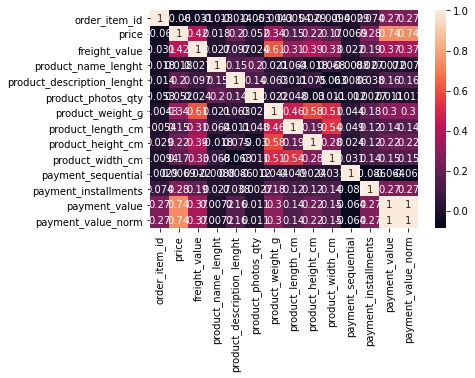

In [34]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

From the above graph, we can see that the only major correlation between columns are related to the normalization we created in the previous step, as well as the `payment_value` column with the `price` and `freight_value` columns, since the former equals the sum of the latter ones.

We see no reason to drop this column as of now, since we would likely need to sum those columns again anyway.

# Descriptive statistics, visualizations and hypothesis testing

<AxesSubplot:xlabel='product_weight_g', ylabel='freight_value'>

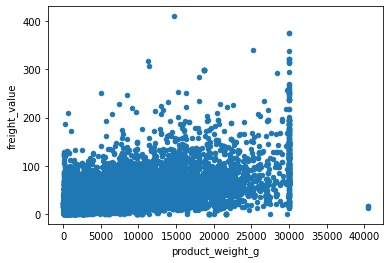

In [35]:
df[["freight_value", "product_weight_g"]].plot.scatter(x="product_weight_g", y="freight_value")

From the above graph we can see the correlation between weight and freight value. 

Initially we expected to see a more direct correlation. However, the values are almost evenly distributed, with even the most heavy products having freight values all across the board.

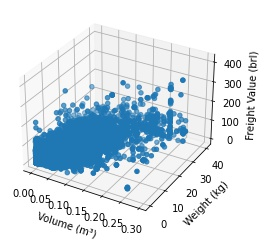

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter((df["product_length_cm"]*df["product_height_cm"]*df["product_width_cm"])/1000000, 
           df["product_weight_g"]/1000, 
           df["freight_value"]
           )

ax.set_xlabel('Volume (m³)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Freight Value (brl)')

plt.show()

Going further with the previous idea, we can now see the correlation between a product's volume (in m³), weight (in kg) and freight value.

Once again, the values are really well distributed, with no clear correlation.

In [37]:
df["volume"] = (df["product_length_cm"] * df["product_height_cm"] * df["product_width_cm"])/1000000

In [38]:
correlations = df.corr(method='spearman')

In [39]:
print(f"Correlation between freight_value and product_weight: {correlations['freight_value']['product_weight_g']}")
print(f"Correlation between freight_value and volume: {correlations['freight_value']['volume']}")

features=list(["volume", "product_weight_g", "freight_value"])
df[features].corr(method='spearman')

Correlation between freight_value and product_weight: 0.44836834178388807
Correlation between freight_value and volume: 0.3703493481230745


,volume,product_weight_g,freight_value
volume,1.000000,0.768138,0.370349
product_weight_g,0.768138,1.000000,0.448368
freight_value,0.370349,0.448368,1.000000


From the above, we can see that the correlation between weight and freight value isn't that conclusive.

Going further and looking at the correlation between volume, weight and freight value, we can see that neither of the dimensions really impact on the freight value.

Not surprisingly, the product's volume has a somewhat high correlation with its weight.

Text(0.5, 1.0, 'Buyer state')

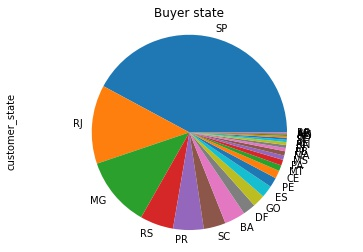

In [40]:
df.customer_state.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Buyer state')

Most of the purchases come from the southeast region of Brazil

Text(0.5, 1.0, 'Payment type')

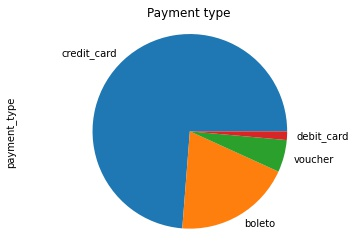

In [41]:
df.payment_type.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Payment type')

Most of the online purchases are paid with a credit card, followed by boleto.

In [42]:
data1 = df[df['payment_type'] == 'credit_card']['payment_value']
data2 = df[df['payment_type'] == 'boleto']['payment_value']
stats.mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=953365020.5, pvalue=2.200471490193158e-32)

Since the p-value is lower than 0.05, the null hypothesis can be rejected, meaning that the distribution of the total purchase values paid by credit card is diferent from the ones paid by boleto.

## Detecting outliers

We'll start searching for outliers on the `payment_installments` and `price` columns.

<AxesSubplot:>

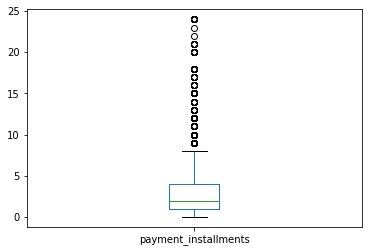

In [43]:
df[['payment_installments']].plot(kind='box')

<AxesSubplot:>

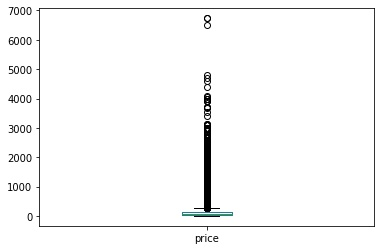

In [44]:
df[['price']].plot(kind='box')

From the above boxplots, we can see that the chosen columns have many outliers.

For the `payment_installments` column, we see outliers starting from around 8 installments. That's expected since most online buyers don't finance their purchases with more than 12 installments in Brazil. For values higher than those are usually due to special credit cards from specific companies that allow up to 24 installments, which is not that common. In order to deal with those values and avoid missing data that is relevant to us, we will just cap them to a max value of 12.

For the `price` column, we see a lot of "outliers", which is expected since the dataset doesn't focus on any specific type of purchase. We won't be dropping or modifying these rows values because it would heavily bias our dataset.

In [45]:
df['payment_installments'][df['payment_installments'] > 12] = 12

/Users/gabriela/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Here is the final result of the `payment_installments` column boxplot after modifying the values, as mentioned before.

<AxesSubplot:>

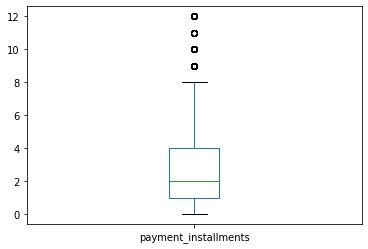

In [47]:
df[['payment_installments']].plot(kind='box')

In [49]:
df.to_csv('project1_output.csv', index=False)